In [61]:
!pip install mplcyberpunk #install 'cyberpunk' style plots

In [47]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [48]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [49]:
print (train_images.shape) # Pay attention to this and test_images shape, 
print (len(train_labels))  # convolution layers doesn`t work with 
print (test_images.shape)  # kind of shape.
print (len(test_labels))

(50000, 32, 32, 3)
50000
(10000, 32, 32, 3)
10000


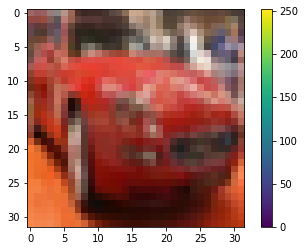

In [50]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [51]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [52]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [53]:

model = keras.Sequential([
    
    keras.layers.Conv2D(64, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(128, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(256, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation="softmax")
])

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

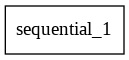

In [55]:
plot_model(model, to_file='model_plot.png')

In [56]:
train_images=train_images.reshape(50000,32,32,3)
test_images=test_images.reshape(10000,32,32,3)


In [58]:
import os

In [59]:
# Using for save weights of network 
ckpoint_path = "save_weights/"
if not os.path.exists(ckpoint_path):
    os.mkdir(ckpoint_path)
else:    
    pass
ckpoint_dir = os.path.dirname(ckpoint_path)
ckpoint_path+='cp0.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [60]:
history = model.fit(train_images, 
                    train_labels,  
                    epochs=10,
                    validation_data=(test_images,test_labels),
                    callbacks=[cp_callback])

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 1.7813 - accuracy: 0.3283
Epoch 00001: saving model to save_weights/cp0.ckpt
1563/1563 [==============================] - 178s 114ms/step - loss: 1.7813 - accuracy: 0.3283 - val_loss: 1.4078 - val_accuracy: 0.4689
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 1.3734 - accuracy: 0.5027
Epoch 00002: saving model to save_weights/cp0.ckpt
1563/1563 [==============================] - 178s 114ms/step - loss: 1.3734 - accuracy: 0.5027 - val_loss: 1.2443 - val_accuracy: 0.5599
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 1.1839 - accuracy: 0.5878
Epoch 00003: saving model to save_weights/cp0.ckpt
1563/1563 [==============================] - 175s 112ms/step - loss: 1.1839 - accuracy: 0.5878 - val_loss: 1.0730 - val_accuracy: 0.6257
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 1.0560 - accuracy: 0.6381
Epoch 00004: saving model to save_weights/cp

In [62]:
import mplcyberpunk

In [63]:
def plot_graphs(history, metric):
  plt.style.use("cyberpunk")
  plt.plot(history.history[metric])
  plt.plot(history.history['val_' + metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_' + metric])
  mplcyberpunk.add_glow_effects()
  plt.show()

In [69]:
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТочность на проверочных данных:', test_acc)

313/313 - 8s - loss: 0.8834 - accuracy: 0.7103

Точность на проверочных данных: 0.7103000283241272


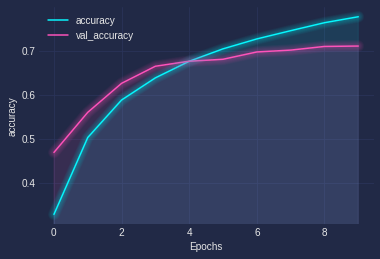

In [71]:
plot_graphs(history, 'accuracy')

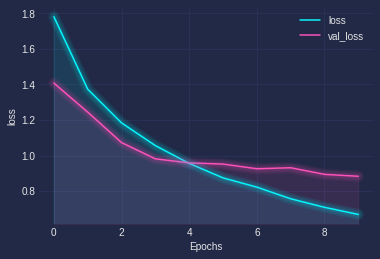

In [72]:
plot_graphs(history, 'loss')

In [73]:
model.save('my_model.h5')

Тут розпочинається тестування моделі з завантаженого файлу

In [17]:
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0

In [21]:
from keras.preprocessing import image 

Using TensorFlow backend.


<function matplotlib.pyplot.show>

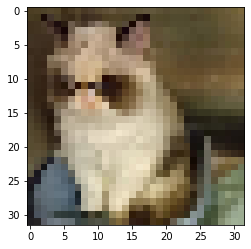

In [38]:

img_patch="images/cat.jpg"
img=image.load_img(img_patch,target_size=(32,32))
plt.imshow(img)
plt.show

In [39]:
x=image.img_to_array(img)
x/=255
x=np.expand_dims(x,axis=0)

In [34]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [35]:

print (x.shape)
print (len(x))

(1, 32, 32, 3)
1


In [40]:
predictions = new_model.predict(x)
predictions[0]

array([4.1362611e-07, 1.0927209e-07, 7.4627472e-04, 6.6813231e-01,
       1.3833688e-04, 3.3040568e-01, 1.6025137e-04, 4.0763890e-04,
       7.2235218e-07, 8.2669621e-06], dtype=float32)

In [41]:
predictions=np.argmax(predictions[0])
print(classes[predictions])

cat
